In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Check the contents of the mounted Google Drive
drive_path = '/content/drive/MyDrive/'
os.listdir(drive_path)

In [4]:
import  zipfile

zipfile_name = "/content/drive/MyDrive/Malaria dataset.zip"
try:
  with zipfile.ZipFile(zipfile_name) as zp:
    zp.extractall()
  print("Successfully extracted")
except:
  print('Error Appeared')
  print("Please CHeck the file")

Successfully extracted


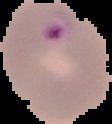

In [2]:
img = cv.imread("/content/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_11.png")
cv2_imshow(img)

In [3]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 , validation_split=0.2 )

In [4]:
data_dir = "/content/Dataset/Train"
train_gener = generator.flow_from_directory(directory=data_dir, target_size=(150 , 150) , class_mode = "categorical" )

Found 416 images belonging to 2 classes.


In [5]:
val_gener = generator.flow_from_directory(directory="/content/Dataset/Test", target_size=(150 , 150) , class_mode = "categorical" , )

Found 134 images belonging to 2 classes.


In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 64 , kernel_size=(3 , 3) , activation = 'relu' , input_shape = (150 , 150  , 3)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters = 64 , kernel_size=(3 , 3) , activation = 'relu' ))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 2 , activation = tf.nn.softmax))

In [7]:
model.compile( loss =  tf.keras.losses.binary_focal_crossentropy , metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dropout (Dropout)           (None, 82944)             0

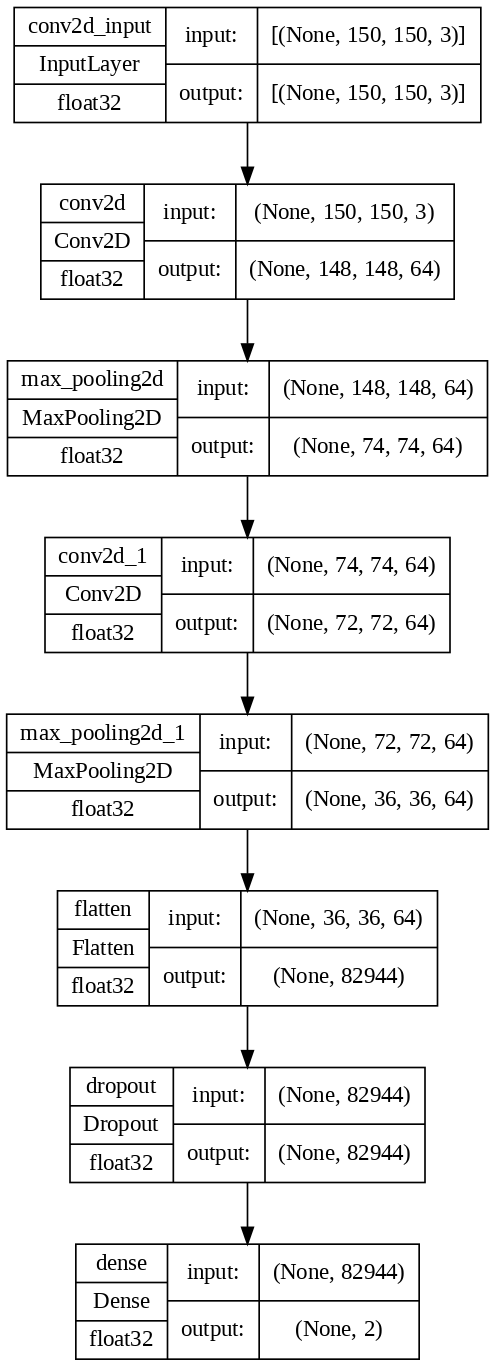

In [9]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [10]:
history = model.fit(x=train_gener, epochs=13, validation_data=val_gener, verbose=1)

Epoch 1/13
13/13 [==============================] - 39s 3s/step - loss: 0.7395 - accuracy: 0.5312 - val_loss: 0.1620 - val_accuracy: 0.6716
Epoch 2/13
13/13 [==============================] - 37s 3s/step - loss: 0.1909 - accuracy: 0.6106 - val_loss: 0.1639 - val_accuracy: 0.6418
Epoch 3/13
13/13 [==============================] - 38s 3s/step - loss: 0.1642 - accuracy: 0.6490 - val_loss: 0.1556 - val_accuracy: 0.6866
Epoch 4/13
13/13 [==============================] - 38s 3s/step - loss: 0.1787 - accuracy: 0.7067 - val_loss: 0.2167 - val_accuracy: 0.4030
Epoch 5/13
13/13 [==============================] - 37s 3s/step - loss: 0.1405 - accuracy: 0.7236 - val_loss: 0.1529 - val_accuracy: 0.6866
Epoch 6/13
13/13 [==============================] - 50s 4s/step - loss: 0.1370 - accuracy: 0.7620 - val_loss: 0.1684 - val_accuracy: 0.6866
Epoch 7/13
13/13 [==============================] - 36s 3s/step - loss: 0.0900 - accuracy: 0.8702 - val_loss: 0.1699 - val_accuracy: 0.5522
Epoch 8/13
13/13 [==

In [11]:
hist = history.history
print(hist)

{'loss': [0.7394512891769409, 0.19085511565208435, 0.16417810320854187, 0.17870944738388062, 0.14051848649978638, 0.1369737684726715, 0.08999413996934891, 0.08764524757862091, 0.05598137527704239, 0.035876668989658356, 0.04788074642419815, 0.01991642639040947, 0.012428558431565762], 'accuracy': [0.53125, 0.6105769276618958, 0.6490384340286255, 0.7067307829856873, 0.723557710647583, 0.7620192170143127, 0.870192289352417, 0.8581730723381042, 0.9302884340286255, 0.9543269276618958, 0.9399038553237915, 0.9807692170143127, 0.9927884340286255], 'val_loss': [0.1619909703731537, 0.16394267976284027, 0.15555818378925323, 0.21671253442764282, 0.15294744074344635, 0.1684398651123047, 0.16988785564899445, 0.17954722046852112, 0.28395575284957886, 0.15958894789218903, 0.16301511228084564, 0.17140357196331024, 0.2110285758972168], 'val_accuracy': [0.6716417670249939, 0.641791045665741, 0.6865671873092651, 0.4029850661754608, 0.6865671873092651, 0.6865671873092651, 0.5522388219833374, 0.5671641826629

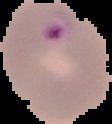

This is the shape of the image (150, 150, 3)
1/1 [==============================] - 0s 170ms/step


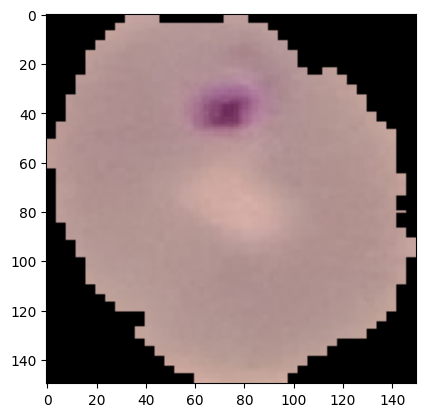

In [12]:
img_path = '/content/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_11.png'
img = cv.imread(img_path)
cv2_imshow(img)
imgp = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
plt.imshow(imgp)
x = tf.keras.preprocessing.image.img_to_array(imgp)
print("This is the shape of the image" , x.shape)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)


In [13]:
print(preds)
map_of_classes = train_gener.class_indices

[[1. 0.]]


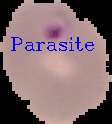

In [14]:
result = ""
for key , value in map_of_classes.items():
  if value == np.argmax(preds):
    result = key
    break
result

cv.putText(img=img , text = result ,color=255 , fontFace=cv.FONT_HERSHEY_COMPLEX, fontScale=0.6, org = (10 , 50) )
cv2_imshow(img)

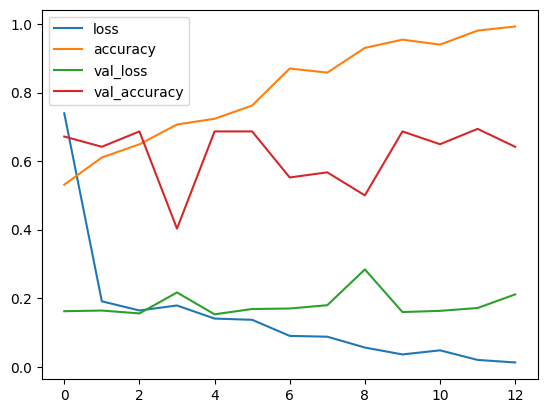

In [15]:
for key , value in hist.items():
  plt.plot(value , label = key )
plt.legend()
plt.show()
